In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project - 605/KMeans/yellow_tripdata.csv', header=None, low_memory=False)

In [ ]:
df.shape

(12210953, 19)

In [ ]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.97674560546875,40.765151977539062,1,N,-74.004264831542969,40.746128082275391,1,9,0.5,0.5,2.05,0,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482360839844,40.767925262451172,1,N,-74.005943298339844,40.733165740966797,1,11,0.5,0.5,3.05,0,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782020568847656,40.644809722900391,1,N,-73.974540710449219,40.675769805908203,1,54.5,0.5,0.5,8,0,0.3,63.8
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863418579101562,40.769813537597656,1,N,-73.969650268554688,40.757766723632812,1,31.5,0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.97174072265625,40.792182922363281,3,N,-74.177169799804688,40.695053100585937,1,98,0,0,0,15.5,0.3,113.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210947,1,2016-03-31 16:34:36,2016-03-31 16:34:36,1,.00,0,0,1,Y,0,0,2,19,1,0.5,0,0,0.3,20.8
12210948,1,2016-03-26 03:02:32,2016-06-14 18:47:55,1,.40,-73.97735595703125,40.774471282958984,1,N,-73.982536315917969,40.772407531738281,1,4,1,0.5,1.7,0,0.3,7.5
12210949,1,2016-03-20 08:43:59,2016-06-27 15:05:01,1,20.20,0,0,2,N,-74.008613586425781,40.710987091064453,1,52,0,0.5,6,5.54,0.3,64.34
12210950,1,2016-03-20 08:49:47,2016-06-28 19:11:27,1,15.40,-73.790077209472656,40.647377014160156,1,N,-73.971755981445312,40.578456878662109,1,42.5,1,0.5,5,0,0.3,49.3


In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract time features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

# Select features for clustering
features = [
    'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'pickup_hour',
    'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra', 'pickup_dayofweek',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
]

In [ ]:
df_cluster = df[features]

In [ ]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Use elbow method to choose k
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [ ]:
X_scaled.shape

(12210952, 14)

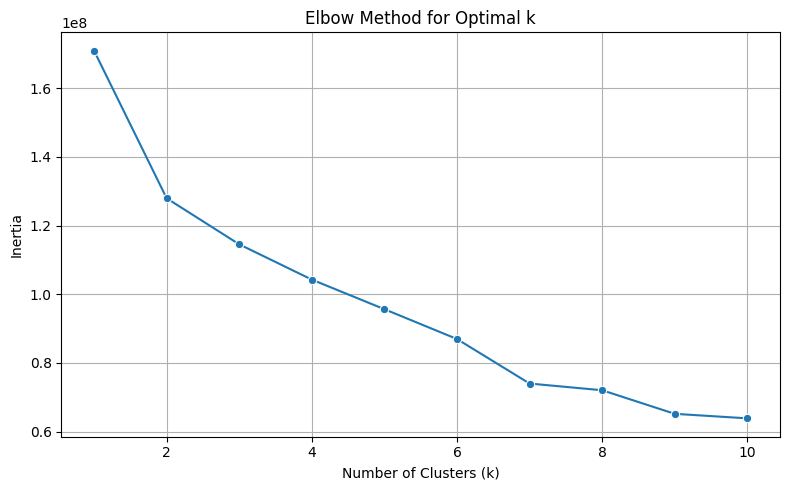

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
start_time = time.time()
kmeans_final = KMeans(n_clusters=5, random_state=42)
kmeans_final.fit(X_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training Time for KMeans (k=5): {training_time:.4f} seconds")

Training Time for KMeans (k=5): 13.0123 seconds


In [ ]:
# Predict cluster labels on test data
start_pred_time = time.time()
y_test_pred = kmeans_final.predict(X_test)
end_pred_time = time.time()

prediction_time = end_pred_time - start_pred_time
print(f"Prediction Time for KMeans: {prediction_time:.4f} seconds")

# Optional: check some predictions
print(f"First 10 predicted cluster labels: {y_test_pred[:10]}")

Prediction Time for KMeans: 0.1560 seconds
First 10 predicted cluster labels: [1 1 0 0 1 4 4 1 1 1]


In [ ]:
import psutil, os
def print_memory_usage_gb():
  # CPU RAM usage
  process = psutil.Process(os.getpid())
  ram_usage_gb = process.memory_info().rss / (1024 ** 3)  # <<< divide by 1024³
  print(f"CPU RAM Usage: {ram_usage_gb:.4f} GB")

print_memory_usage_gb()

CPU RAM Usage: 9.2208 GB
